# Homework 6
## Due:  Tuesday, October 10 at 11:59 PM

# Problem 1: Bank Account Revisited

We are going to rewrite the bank account closure problem we had a few assignments ago, only this time developing a formal class for a Bank User and Bank Account to use in our closure (recall previously we just had a nonlocal variable amount that we changed). 

### Some Preliminaries:
First we are going to define two types of bank accounts.  Use the code below to do this:

In [1]:
from enum import Enum
class AccountType(Enum):
    SAVINGS = 1
    CHECKING = 2

An Enum stands for an enumeration, it's a convenient way for you to define lists of things. Typing:

In [2]:
AccountType.SAVINGS

<AccountType.SAVINGS: 1>

returns a Python representation of an enumeration. You can compare these account types:

In [3]:
AccountType.SAVINGS == AccountType.SAVINGS

True

In [4]:
AccountType.SAVINGS == AccountType.CHECKING

False

To get a string representation of an Enum, you can use:

In [5]:
AccountType.SAVINGS.name

'SAVINGS'

### Part 1: Create a BankAccount class with the following specification:

Constructor is `BankAccount(self, owner, accountType)` where `owner` is a string representing the name of the account owner and `accountType` is one of the AccountType enums

Methods `withdraw(self, amount)` and `deposit(self, amount)` to modify the account balance of the account

Override methods `__str__` to write an informative string of the account owner and the type of account, and `__len__` to return the balance of the account

In [6]:
class BankAccount():
    def __init__ (self, owner, accountType):
        """ Init balance to 0. """
        self.owner = owner
        self.accountType = accountType
        self.balance = 0

    def withdraw (self, amount):
        if self.balance < amount:
            raise ValueError('Cannot withdraw more than current balance.')
        if amount < 0:
            raise ValueError('Cannot withdraw negative amount.')

        self.balance -= amount

    def deposit (self, amount):
        if amount < 0:
            raise ValueError('Cannot deposit negative amount.')

        self.balance += amount

    def __str__ (self):
        return 'Type: {0}\nOwner: {1}\nBalance: {2:.2f}'.format(
              self.accountType.name, self.owner, self.balance)

    def __len__ (self):
        return self.balance

### Part 2:  Write a class BankUser with the following specification:

Constructor `BankUser(self, owner)` where `owner` is the name of the account.

Method `addAccount(self, accountType)` - to start, a user will have no accounts when the BankUser object is created. `addAccount` will add a new account to the user of the `accountType` specified. **Only one savings/checking account per user, return appropriate error otherwise**

Methods `getBalance(self, accountType)`, `deposit(self, accountType, amount)`, and `withdraw(self, accountType, amount)` for a specific AccountType.

Override `__str__` to have an informative summary of user's accounts.

In [7]:
class BankUser():
    def __init__ (self, owner):
        self.owner = owner
        self.accounts = {}

    def addAccount (self, accountType):
        """ Raises ValueError if user already has an account of this type. """
        if len(self.accounts) > 0:
            if accountType in self.accounts:
                raise ValueError('Only one {} account per user.'.format(
                      accountType.name))

        new_account = BankAccount(self.owner, accountType)
        self.accounts[accountType] = new_account

    def getBalance (self, accountType):
        if accountType not in self.accounts:
            raise ValueError('{0} has no {1} account.'.format(
                  self.owner, accountType.name))

        return self.accounts[accountType].balance

    def deposit (self, accountType, amount):
        if accountType not in self.accounts:
            raise ValueError('{0} has no {1} account.'.format(
                  self.owner, accountType.name))

        self.accounts[accountType].deposit(amount)

    def withdraw (self, accountType, amount):
        if accountType not in self.accounts:
            raise ValueError('{0} has no {1} account.'.format(
                  self.owner, accountType.name))

        self.accounts[accountType].withdraw(amount)

    def __str__ (self):
        msg = '{} has '.format(self.owner)
        if len(self.accounts) == 0:
            msg += 'no accounts.'
            return msg

        if len(self.accounts) == 1:
            msg += '1 account.'
        else:
            msg += '{} accounts.'.format(len(self.accounts))

        for i, acct in self.accounts.items():
            msg += '\n' + '-' * 20 + '\n'  # divider
            msg += str(acct)

        return msg

Write some simple tests to make sure this is working. Think of edge scenarios a user might try to do.

In [8]:
import pytest

def test_withdraw_more_than_balance ():
    user = BankUser('George Nelson')
    user.addAccount(AccountType.CHECKING)
    user.deposit(AccountType.CHECKING, 1000)
    with pytest.raises(ValueError, message='Expecting ValueError'):
        user.withdraw(AccountType.CHECKING, 1005)


def test_deposit_negative_amount ():
    user = BankUser('George Nelson')
    user.addAccount(AccountType.CHECKING)
    with pytest.raises(ValueError, message='Expecting ValueError'):
        user.deposit(AccountType.CHECKING, -200)


def test_getBalance ():
    """ Ensure balance after several deposits/withdrawals is what expected. """
    user = BankUser('George Nelson')
    user.addAccount(AccountType.SAVINGS)
    user.deposit(AccountType.SAVINGS, 5000)
    user.withdraw(AccountType.SAVINGS, 2000)
    user.deposit(AccountType.SAVINGS, 500)
    assert user.getBalance(AccountType.SAVINGS) == 3500


def test_user_str ():
    """ Ensure expected parts of string representation are present. """
    user = BankUser('George Nelson')
    user.addAccount(AccountType.SAVINGS)
    user.deposit(AccountType.SAVINGS, 10)
    summary = str(user)
    assert 'SAVINGS' in summary
    assert 'George Nelson' in summary
    assert '10.00' in summary


test_withdraw_more_than_balance()
test_deposit_negative_amount()
test_getBalance()
test_user_str()

### Part 3:  ATM Closure

Finally, we are going to rewrite a closure to use our bank account. We will make use of the [input function](http://anh.cs.luc.edu/python/hands-on/3.1/handsonHtml/io.html) which takes user input to decide what actions to take.

Write a closure called ATMSession(bankUser) which takes in a BankUser object. Return a method called Interface that when called, would provide the following interface:

First screen for user will look like:


**Enter Option:**

**1)Exit**

**2)Create Account**

**3)Check Balance**

**4)Deposit**

**5)Withdraw**


Pressing 1 will exit, any other option will show the options:



**Enter Option:**

**1)Checking**

**2)Savings**


If a deposit or withdraw was chosen, then there must be a third screen:



**Enter Integer Amount, Cannot Be Negative:**

This is to keep the code relatively simple, if you'd like you can also curate the options depending on the BankUser object (for example, if user has no accounts then only show the Create Account option), but this is up to you. In any case, you must handle any input from the user in a reasonable way that an actual bank would be okay with, and give the user a proper response to the action specified.

Upon finishing a transaction or viewing balance, it should go back to the original screen

In [9]:
def ATMSession (bankUser):
    """ Returns closure method providing session for BankUser class. """

    def Interface ():
        def get_main_user_option ():
            option_request = 'Enter Option:\n\n1)Exit\n2)Create Account\n3)Check ' \
                             'Balance\n4)Deposit\n5)Withdraw\n'
            try:
                response = int(input(option_request))
            except:
                print('Retrying due to invalid command.\n')
                return get_main_user_option()
            else:
                if response in [1, 2, 3, 4, 5]:
                    return response
                print('Retrying due to invalid response number.\n')
                return get_main_user_option()

        def get_account_type ():
            option_request = 'Enter Option:\n1)Checking\n2)Savings\n'
            try:
                response = int(input(option_request))
            except:
                print('Retrying due to invalid command.\n')
                return get_account_type()

            if response == 1:
                return AccountType.SAVINGS
            elif response == 2:
                return AccountType.CHECKING
            else:
                print('Invalid account type provided. Retrying.\n')
                return get_account_type()

        def get_int_amount ():
            try:
                response = int(input('Enter Integer Amount, Cannot Be Negative:\n'))
            except:
                print('Retrying due to invalid integer amount.\n')
                return get_int_amount()
            else:
                if response >= 0:
                    return response
                print('Amount cannot be negative.\n')
                return get_int_amount()

        while True:
            option = get_main_user_option()

            if option == 1:
                break

            if option == 2:
                acct_type = get_account_type()
                bankUser.addAccount(acct_type)
                print('Account added\n')

            if option == 3:
                acct_type = get_account_type()
                balance = bankUser.getBalance(acct_type)
                print('Balance = {:.2f}\n'.format(balance))

            if option == 4:
                acct_type = get_account_type()
                amount = get_int_amount()
                try:
                    bankUser.deposit(acct_type, amount)
                except Exception as e:
                    print(e)

            if option == 5:
                acct_type = get_account_type()
                amount = get_int_amount()
                try:
                    bankUser.withdraw(acct_type, amount)
                except Exception as e:
                    print(e)

### Part 4:  Put everything in a module Bank.py

We will be grading this problem with a test suite. Put the enum, classes, and closure in a single file named Bank.py. It is very important that the class and method specifications we provided are used (with the same capitalization), otherwise you will receive no credit.

---

## Problem 2:  Linear Regression Class

Let's say you want to create Python classes for three related types of linear regression: Ordinary Least Squares Linear Regression, Ridge Regression, and Lasso Regression. 

Consider the multivariate linear model:

$$y = X\beta + \epsilon$$

where $y$ is a length $n$ vector, $X$ is an $m \times p$ matrix, and $\beta$
is a $p$ length vector of coefficients.

#### Ordinary Least Squares Linear Regression

[OLS Regression](https://en.wikipedia.org/wiki/Ordinary_least_squares) seeks to minimize the following cost function:

$$\|y - \beta\mathbf {X}\|^{2}$$

The best fit coefficients can be obtained by:

$$\hat{\beta} = (X^T X)^{-1}X^Ty$$

where $X^T$ is the transpose of the matrix $X$ and $X^{-1}$ is the inverse of the matrix $X$.

#### Ridge Regression

[Ridge Regression](https://en.wikipedia.org/wiki/Tikhonov_regularization) introduces an L2 regularization term to the cost function:

$$\|y - \beta\mathbf {X}\|^{2}+\|\Gamma \mathbf {x} \|^{2}$$

Where $\Gamma = \alpha I$ for some constant $\alpha$ and the identity matrix $I$.

The best fit coefficients can be obtained by:
$$\hat{\beta} = (X^T X+\Gamma^T\Gamma)^{-1}X^Ty$$

#### Lasso Regression

[Lasso Regression](https://en.wikipedia.org/wiki/Lasso_%28statistics%29) introduces an L1 regularization term and restricts the total number of predictor variables in the model.
The following cost function:
$${\displaystyle \min _{\beta _{0},\beta }\left\{{\frac {1}{m}}\left\|y-\beta _{0}-X\beta \right\|_{2}^{2}\right\}{\text{ subject to }}\|\beta \|_{1}\leq \alpha.}$$

does not have a nice closed form solution. For the sake of this exercise, you may use the [sklearn.linear_model.Lasso](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) class, which uses a coordinate descent algorithm to find the best fit. You should only use the class in the fit() method of this exercise (ie. do not re-use the sklearn for other methods in your class).

#### $R^2$ score

The $R^2$ score is defined as:
$${R^{2} = {1-{SS_E \over SS_T}}}$$

Where:

$$SS_T=\sum_i (y_i-\bar{y})^2, SS_R=\sum_i (\hat{y_i}-\bar{y})^2, SS_E=\sum_i (y_i - \hat{y_i})^2$$

where  ${y_i}$ are the original data values, $\hat{y_i}$ are the predicted values, and $\bar{y_i}$ is the mean of the original data values.

### Part 1:  Base Class
Write a class called `Regression` with the following methods:

$fit(X, y)$: Fits linear model to $X$ and $y$.

$get\_params()$: Returns $\hat{\beta}$ for the fitted model. The parameters should be stored in a dictionary.

$predict(X)$: Predict new values with the fitted model given $X$.

$score(X, y)$: Returns $R^2$ value of the fitted model.

$set\_params()$: Manually set the parameters of the linear model.

This parent class should throw a `NotImplementedError` for methods that are intended to be implemented by subclasses.

In [10]:
class Regression():
    def __init__ (self):
        self._params = {}
        self.name = None

    def fit (self, X, y):
        raise NotImplementedError

    def get_params (self):
        return self._params

    def predict (self, X):
        beta = self._params['beta']
        return np.dot(X, beta)

    def set_params (self, params):
        self._params = params

### Part 2: OLS Linear Regression

Write a class called `OLSRegression` that implements the OLS Regression model described above and inherits the `Regression` class.

In [11]:
import numpy as np

class OLSRegression(Regression):
    def __init__ (self):
        super().__init__()
        self.name = 'OLS'

    def fit (self, X, y):
        X_T = X.transpose()
        self._params['beta'] = np.dot(np.dot(
              np.linalg.inv(np.dot(X_T, X)), X_T),
              y)

    @staticmethod
    def score (y_true, y_pred):
        """ Returns R^2 score of fitted model.

        Args:
            y_true: Original data values.
            y_pred: Predicted values.

        Returns:
            1 - SSE/SST
        """
        SSE, SST = 0, 0
        y_bar = np.mean(y_true)
        for y_t, y_p in zip(y_true, y_pred):
            SSE += (y_t - y_p) ** 2
            SST += (y_t - y_bar) ** 2
        return 1 - (SSE / SST)

### Part 3: Ridge Regression

Write a class called `RidgeRegression` that implements Ridge Regression and inherits the `OLSRegression` class.

In [12]:
import warnings

class RidgeRegression(OLSRegression):
    def __init__ (self, alpha=None):
        super().__init__()
        self._params['alpha'] = alpha
        self.name = 'Ridge'

    def fit (self, X, y):
        alpha = self._params['alpha']
        if alpha is None:
            warnings.warn('RidgeRegression.fit() called without alpha being set. '
                          'Fitting with alpha = 0.')
            alpha = 0

        m, n = np.shape(X)
        G = np.identity(n) * alpha

        X_T = X.transpose()
        self._params['beta'] = np.dot(
              np.dot(
                    np.linalg.inv(np.add(np.dot(X_T, X), np.dot(G.transpose(), G))),
                    X_T),
              y
              )

### Part 3: Lasso Regression

Write a class called `LassoRegression` that implements Lasso Regression and inherits the `OLSRegression` class. You should only use Lasso(), Lasso.fit(), Lasso.coef_, and Lasso._intercept from the `sklearn.linear_model.Lasso` class.

In [13]:
from sklearn.linear_model import Lasso

class LassoRegression(OLSRegression):
    
    def __init__ (self, alpha=None):
        super().__init__()
        self._params['alpha'] = alpha
        self.name = 'Lasso'

    def fit (self, X, y):
        alpha = self._params['alpha']
        if alpha is None:
            warnings.warn('RidgeRegression.fit() called without alpha being set. '
                          'Fitting with alpha = 0.')
            alpha = 0

        lasso = Lasso(alpha=alpha, fit_intercept=False).fit(X, y)
        self._params['beta'] = lasso.coef_
        self._params['intercept'] = lasso.intercept_

### Part 4: Model Scoring
You will use the [Boston dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) for this part.

Instantiate each of the three models above.  Using a for loop, fit (on the training data) and score (on the testing data) each model on the Boston dataset.  

Print out the $R^2$ value for each model and the parameters for the best model using the `get_params()` method. Use an $\alpha$ value of 0.1.

**Hint:**  You can consider using the `sklearn.model_selection.train_test_split` method to create the training and test datasets.

In [14]:
import sklearn.datasets
from sklearn.model_selection import train_test_split

X, y = sklearn.datasets.load_boston(True)
X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.33, random_state=42)

models = [OLSRegression(), RidgeRegression(alpha=0.1), LassoRegression(alpha=0.1)]

# Keep track of index for model with top R^2.
top_r2 = -1
top_model = -1
for i, model in enumerate(models):
    print('Fitting {} model.'.format(model.name))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = model.score(y_test, y_pred)
    if r2 > top_r2:
        top_r2 = r2
        top_model = i
    print('R^2: {0}\n'.format(r2))

print('Best model: {}'.format(models[top_model].name))
print('Params: {}'.format(models[top_model].get_params()))

Fitting OLS model.
R^2: 0.6878540268303749

Fitting Ridge model.
R^2: 0.6878506855813118

Fitting Lasso model.
R^2: 0.6866202054281176

Best model: OLS
Params: {'beta': array([ -1.08886522e-01,   3.97963612e-02,   4.89530368e-02,
         3.17006469e+00,  -2.35286115e+00,   5.78124804e+00,
        -1.62610577e-02,  -9.19529268e-01,   9.96534030e-02,
        -5.37692779e-03,  -4.16743063e-01,   1.68675114e-02,
        -4.68597923e-01])}


### Part 5: Visualize Model Performance

We can evaluate how the models perform for various values of $\alpha$. Calculate the $R^2$ scores for each model for  $\alpha \in [0.05, 1]$ and plot the three lines on the same graph. To change the parameters, use the `set_params()` method. Be sure to label each line and add axis labels.

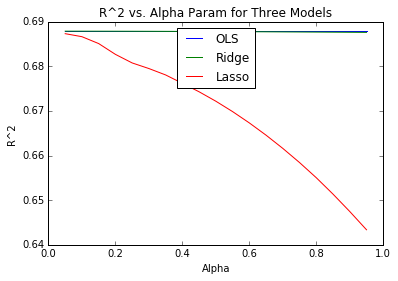

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

X, y = sklearn.datasets.load_boston(True)
X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.33, random_state=42)

models = [OLSRegression(), RidgeRegression(), LassoRegression()]
results = [[], [], []]
alphas = np.arange(0.05, 1, step=0.05)
for alpha in alphas:
    for i, model in enumerate(models):
        if model.name != 'OLS':
            model.set_params({'alpha':alpha})
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = model.score(y_test, y_pred)
        results[i].append(r2)

# Plot results.
for i in range(len(results)):
    plt.plot(alphas, results[i], label=models[i].name)

plt.legend(loc=9)
plt.title('R^2 vs. Alpha Param for Three Models')
plt.ylabel('R^2')
plt.xlabel('Alpha')